# Task1 Of Mini Project 1
## AmirHossein Hadinezhad, Andrei Serban, Gabriel Alejandro Martinica Ardon

### Adding required libraries

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix

### Loading the data (part3)

In [79]:
sample =  datasets.load_files("BBC/", description="BBC Text Database",  encoding="latin1")

### Distribution Graph (Part2)

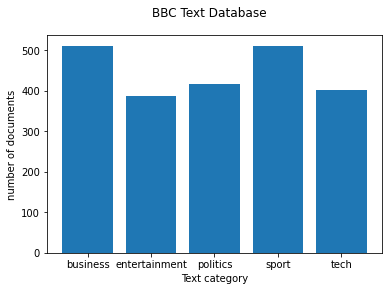

In [16]:
x_axis = sample.target_names
y_axis = [np.count_nonzero(sample.target==0),
         np.count_nonzero(sample.target==1),
         np.count_nonzero(sample.target==2),
         np.count_nonzero(sample.target==3),
         np.count_nonzero(sample.target==4)]

# plt.figure(figsize=(21, 12))
plt.plot()
plt.ylabel('number of documents')
plt.xlabel('Text category')
plt.bar(x_axis, y_axis)
plt.suptitle(sample.DESCR)
plt.savefig("BBC-distribution.pdf", format="pdf")
plt.show()


### Pre-processing the data (part4)

In [100]:
# x is a count_vectorizer to array we get a list where the length is the number of total documents and each element
# in the list is the frequency of the words in that article according to the order of the vocabulary 


cv = CountVectorizer()
vocab = cv.fit_transform(sample.data)
x = vocab.toarray()
y = sample.target 

### Split dataset for training and test (part5)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = None)


 ### Train using Naive Bayes Classifier (part6)

In [19]:
naive_bayes_training = MultinomialNB()
naive_bayes_training.fit(X_train, y_train)


MultinomialNB()

 ### Create bbc-performance.txt to save the followinf information (part7)

In [20]:
f = open("bbc-performance.txt", "w")
f.close()

###  separator and describing model (part7a)

In [21]:
f = open("bbc-performance.txt", "a")
f.write("\n\t**********************************\n")
f.write("\n\ta)MultinomialNB default values, try 1\n\n\n")
f.close()

####  Confusion Metrix (part7b)

In [22]:
f = open("bbc-performance.txt", "a")
f.write("\n\t**********************************\n")
f.write("\nb)Confusion matrix \n\n\n")
y_predicted = naive_bayes_training.predict(X_test)
f.write(repr(confusion_matrix(y_test, y_predicted)))
f.close()

#### precision, recall, and F1-measure for each class (part7c)

In [30]:
f = open("bbc-performance.txt", "a")
f.write("\n\t**********************************\n")
f.write("\nc)Precision, recall, and F1-measure for each class \n\n\n")
f.write(repr(classification_report(y_test, y_predicted,target_names=["business","entertainment","politics","sport","tech"])))
f.close()

#### accuracy, macro-average F1 and weighted-average F1 of the model (part7d)

In [31]:
f = open("bbc-performance.txt", "a")
f.write("\n\t**********************************\n")
f.write("\n d) \nAccuracy score:\n")
f.write(repr(accuracy_score(y_test, y_predicted)))

f.write("\nMacro F1 average:\n")
f.write(repr(f1_score(y_test, y_predicted, average='macro')))

f.write("\nWeighted F1 average:\n")
f.write(repr(f1_score(y_test, y_predicted, average='weighted')))
f.close()

#### prior probability of each class (part7e)

In [32]:
f = open("bbc-performance.txt", "a")
f.write("\n\t**********************************\n")
f.write("\n\nPrior probabilities (part7e):\n")
classes_count = naive_bayes_training.class_count_
total_doc_num_in_training = classes_count.sum(axis=0)
f.write("Total num of doc in training set: "+repr(total_doc_num_in_training))

f.write("\nnum of business doc: " + repr(classes_count[0]) + " ,Percentage: " + repr( ((classes_count[0])/total_doc_num_in_training)*100) )
f.write("\nnum of entertainment doc: " + repr(classes_count[1]) + " ,Percentage: " + repr( ((classes_count[1])/total_doc_num_in_training)*100) )
f.write("\nnum of politics doc: " + repr(classes_count[2]) + " ,Percentage: " + repr( ((classes_count[2])/total_doc_num_in_training)*100) )
f.write("\nnum of sport doc: " + repr(classes_count[3]) + " ,Percentage: " + repr( ((classes_count[3])/total_doc_num_in_training)*100) )
f.write("\nnum of tech doc: "+ repr(classes_count[4]) + " ,Percentage: " + repr( ((classes_count[4])/total_doc_num_in_training)*100) )


f.close()

#### size of the vocabulary (part7f)

In [34]:
f = open("bbc-performance.txt", "a")
f.write("\n\t**********************************\n")
f.write("\n\nf)Size of vocabulary\n")
print(len(cv.get_feature_names_out()))
f.close()

29421


#### number of word-tokens in each class (part7g)

In [46]:
f = open("bbc-performance.txt", "a")
f.write("\n\t**********************************\n")
f.write("\n\nNumber of word-tokens in each class \n")
count = 0
article_list = sample['data']


for article in article_list:
    count += len(article)
f.write(repr(count))

f.close()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


#### number of word-tokens in the entire corpus (part h)


In [41]:
f = open("bbc-performance.txt", "a")
f.write("\n\t**********************************\n")
f.write("\n\nNumber of word-tokens in the entire corpus \n")
word_tokens_corpus = sum(sum(x))
f.write(repr(word_tokens_corpus))
f.close()

#### Words with a frequency of zero in each class (part7i)

In [10]:
f = open("bbc-performance.txt", "a")
f.write("\n\t**********************************\n")
f.write("\n\nWords with a frequency of zero in each class (part7i)\n")

classified_data = naive_bayes_training.feature_count_     
business = classified_data[0]
entertainment = classified_data[1]
politics= classified_data[2]
sport = classified_data[3]
tech = classified_data[4]



f.write("Num of Total unique words in training set "+ repr(X_train.shape[1])) 
business = np.array(business)
zeros_in_business = np.count_nonzero(business==0)
f.write("\n num of Z in business: "+ repr((zeros_in_business-1))+ " ,Percentage: "+ repr((zeros_in_business-1)/X_train.shape[1] *100))

entertainment = np.array(entertainment)
zeros_in_entertainment = np.count_nonzero(entertainment==0)
f.write("\n num of Z in entertainment: "+ repr(zeros_in_entertainment)+ " ,Percentage: "+ repr(zeros_in_entertainment/X_train.shape[1] *100))

politics = np.array(politics)
zeros_in_politicst = np.count_nonzero(politics==0)
f.write("\n num of Z in politics: "+ repr(zeros_in_politicst)+ " ,Percentage: "+ repr(zeros_in_politicst/X_train.shape[1] *100))

sport = np.array(sport)
zeros_in_sport= np.count_nonzero(sport==0)
f.write("\n num of Z in sport: "+ repr(zeros_in_sport)+ " ,Percentage: "+ repr(zeros_in_sport/X_train.shape[1] *100))

tech = np.array(tech)
zeros_in_tech = np.count_nonzero(tech==0)
f.write("\n num of Z in tech: "+ repr(zeros_in_tech)+ " ,Percentage: "+ repr(zeros_in_tech/X_train.shape[1] *100))

f.close()

# Seconed approch

# f = open("bbc-performance.txt", "a")
# f.write("\nWords with a frequency of zero in each class (part7i)\n")
# w = np.concatenate((X_train, y_train[:,None]), axis=1)

# business=[]
# entertainment=[]
# politics=[]
# sport=[]
# tech=[]
# for item in w:
#     if(item[-1]==0):
#         business.append(item)
#     if(item[-1]==1):
#         entertainment.append(item)
#     if(item[-1]==2):
#         politics.append(item)
#     if(item[-1]==3):
#         sport.append(item)
#     if(item[-1]==4):
#         tech.append(item)
        


# f.write("Num of Total unique words "+ repr(X_train.shape[1])) 
# business = np.array(business)
# zeros_in_business = np.count_nonzero(business.sum(axis=0)==0)
# f.write("\n num of Z in business: "+ repr((zeros_in_business-1))+ " ,Percentage: "+ repr((zeros_in_business-1)/X_train.shape[1] *100))

# entertainment = np.array(entertainment)
# zeros_in_entertainment = np.count_nonzero(entertainment.sum(axis=0)==0)
# f.write("\n num of Z in entertainment: "+ repr(zeros_in_entertainment)+ " ,Percentage: "+ repr(zeros_in_entertainment/X_train.shape[1] *100))

# politics = np.array(politics)
# zeros_in_politicst = np.count_nonzero(politics.sum(axis=0)==0)
# f.write("\n num of Z in politics: "+ repr(zeros_in_politicst)+ " ,Percentage: "+ repr(zeros_in_politicst/X_train.shape[1] *100))

# sport = np.array(sport)
# zeros_in_sport= np.count_nonzero(sport.sum(axis=0)==0)
# f.write("\n num of Z in sport: "+ repr(zeros_in_sport)+ " ,Percentage: "+ repr(zeros_in_sport/X_train.shape[1] *100))

# tech = np.array(tech)
# zeros_in_tech = np.count_nonzero(tech.sum(axis=0)==0)
# f.write("\n num of Z in tech: "+ repr(zeros_in_tech)+ " ,Percentage: "+ repr(zeros_in_tech/X_train.shape[1] *100))

# f.close()

 #### Words with a frequency of one in the entire corpus (part7j)

In [11]:
f = open("bbc-performance.txt", "a")
ones_in_tottal = np.count_nonzero(classified_data.sum(axis=0)==1)
f.write("\n\t**********************************\n")
f.write("\n\nWords with a frequency of one in the entire corpus (part7j)\n")
f.write("number of words with a frequency of one in the entire corpus: "+ repr(ones_in_tottal) )
f.write("\nPercentage: "+ repr ((ones_in_tottal/X_train.shape[1]) *100))
f.close()


#### log-prob of 2 favorite words (part7k)

In [118]:
f = open("bbc-performance.txt", "a")
f.write("\n\t**********************************\n")

f.write("k) Your 2 favorite words (that are present in the vocabulary) and their log-prob")


vocabulary = cv.get_feature_names_out()

company_index = int(np.where(vocabulary == "company")[0])

intelligence_index = int(np.where(vocabulary == "intelligence")[0])

f.write("\nLog probability of company in each class in the following order: business, entertainment, politics, sports, tech \n")

f.write(str(naive_bayes_training.feature_log_prob_[0][company_index])+ "\n")
f.write(str(naive_bayes_training.feature_log_prob_[1][company_index])+ "\n")
f.write(str(naive_bayes_training.feature_log_prob_[2][company_index])+ "\n")
f.write(str(naive_bayes_training.feature_log_prob_[3][company_index])+ "\n")
f.write(str(naive_bayes_training.feature_log_prob_[4][company_index])+ "\n")

f.write("\nLog probability of intelligence in each class in the following order: business, entertainment, politics, sports, tech \n")


f.write(str(naive_bayes_training.feature_log_prob_[0][intelligence_index]) + "\n")
f.write(str(naive_bayes_training.feature_log_prob_[1][intelligence_index])+ "\n")
f.write(str(naive_bayes_training.feature_log_prob_[2][intelligence_index])+ "\n")
f.write(str(naive_bayes_training.feature_log_prob_[3][intelligence_index])+ "\n")
f.write(str(naive_bayes_training.feature_log_prob_[4][intelligence_index])+ "\n")

f.close()

 ###  MultinomialNB default values, try 2 (part8)

#### separator and describing model (MultinomialNB default2)

In [12]:
f = open("bbc-performance.txt", "a")
f.write("\n\n\n\n\t**********************************\n")
f.write("\n\tMultinomialNB default values, try 2\n\n\n")
f.close()

 #### Train using Naive Bayes Classifier

In [ ]:
naive_bayes_training2 = MultinomialNB()
naive_bayes_training2.fit(X_train, y_train)

 #### Confusion Metrix

In [ ]:
f = open("bbc-performance.txt", "a")
f.write("\nConfusion Metrix: \n")
y_predicted = naive_bayes_training2.predict(X_test)
f.write(repr(confusion_matrix(y_test, y_predicted)))
f.close()

#### precision, recall, and F1-measure for each class

In [ ]:
f = open("bbc-performance.txt", "a")
f.write("\nAccuracy score:\n")
#write your code

f.close()

#### accuracy, macro-average F1 and weighted-average F1 of the model 

#### prior probability of each class

#### size of the vocabulary

#### number of word-tokens in each class

#### number of word-tokens in the entire corpus

#### Words with a frequency of zero in each class

#### Words with a frequency of one in the entire corpus

#### log-prob of 2 favorite words

 ###  MultinomialNB with smoothing value of 0.0001(part9)

#### separator and describing model (MultinomialNB with smoothing value of 0.0001)

In [88]:
f = open("bbc-performance.txt", "a")
f.write("\n\n\n\n\t**********************************\n")
f.write("\n\tMultinomialNB with smoothing value of 0.0001\n\n\n")
f.close()

 #### Train using Naive Bayes Classifier

In [89]:
naive_bayes_training_smoothing = MultinomialNB(alpha=0.0001)
naive_bayes_training_smoothing.fit(X_train, y_train)

MultinomialNB(alpha=0.0001)

 #### Confusion Metrix

In [62]:
f = open("bbc-performance.txt", "a")
f.write("\nConfusion Metrix: \n")
y_predicted = naive_bayes_training_smoothing.predict(X_test)
f.write(repr(confusion_matrix(y_test, y_predicted)))
f.close()

#### precision, recall, and F1-measure for each class

#### accuracy, macro-average F1 and weighted-average F1 of the model 

#### prior probability of each class

#### size of the vocabulary

#### number of word-tokens in each class

#### number of word-tokens in the entire corpus

#### Words with a frequency of zero in each class

#### Words with a frequency of one in the entire corpus

#### log-prob of 2 favorite words

 ###  MultinomialNB with smoothing value of 0.9(part10)

#### separator and describing model (MultinomialNB with smoothing value of 0.9)

In [63]:
f = open("bbc-performance.txt", "a")
f.write("\n\n\n\n\t**********************************\n")
f.write("\n\tMultinomialNB with smoothing value of 0.9\n\n\n")
f.close()

 #### Train using Naive Bayes Classifier

In [64]:
naive_bayes_training_smoothing2 = MultinomialNB(alpha=0.9)
naive_bayes_training_smoothing2.fit(X_train, y_train)

MultinomialNB(alpha=0.9)

 #### Confusion Metrix

In [65]:
f = open("bbc-performance.txt", "a")
f.write("\nConfusion Metrix: \n")
y_predicted = naive_bayes_training_smoothing2.predict(X_test)
confusion_matrix(y_test, y_predicted)
f.write(repr(confusion_matrix(y_test, y_predicted)))
f.close()

#### precision, recall, and F1-measure for each class

#### accuracy, macro-average F1 and weighted-average F1 of the model 

#### prior probability of each class

#### size of the vocabulary

#### number of word-tokens in each class

#### number of word-tokens in the entire corpus

#### Words with a frequency of zero in each class

#### Words with a frequency of one in the entire corpus

#### log-prob of 2 favorite words